In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1 = df.copy()
df1.shape

(13320, 9)

In [4]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [5]:
df1['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [6]:
# Drop features that are not required to build our model

df2 = df1.drop(['area_type','society'],axis='columns')
df2.shape

(13320, 7)

### Data Cleansing

In [7]:
df2.isnull().sum()

availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [8]:
# Applying median to the balcony and bath column
from math import floor

balcony_median = float(floor(df2.balcony.median()))
bath_median = float(floor(df2.bath.median()))

df2.balcony = df2.balcony.fillna(balcony_median)
df2.bath = df2.bath.fillna(bath_median)

In [9]:
df2.shape

(13320, 7)

In [10]:
df2.isnull().sum()

availability     0
location         1
size            16
total_sqft       0
bath             0
balcony          0
price            0
dtype: int64

In [11]:
df3 = df2.dropna()
df3.isnull().sum()

availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [12]:
df3.shape

(13303, 7)

### Feature Engineering

In [13]:
# New Column for BHK in integer
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.bhk.unique()

C:\Users\Nimish\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [14]:
# Exploring Total Square feet
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,availability,location,size,total_sqft,bath,balcony,price,bhk
30,19-Dec,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
56,20-Feb,Devanahalli,4 Bedroom,3010 - 3410,2.0,2.0,192.000,4
81,18-Oct,Hennur Road,4 Bedroom,2957 - 3450,2.0,2.0,224.500,4
122,18-Mar,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,19-Mar,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,18-Dec,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,Ready To Move,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
224,19-Dec,Devanahalli,3 BHK,1520 - 1740,2.0,2.0,74.820,3
410,Ready To Move,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,18-Sep,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2


In [16]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [17]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head()

,availability,location,size,total_sqft,bath,balcony,price,bhk
0,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [18]:
df4.isnull().sum()

availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
bhk             0
dtype: int64

In [19]:
# Price per sqft is a key feature for price of a house
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [20]:
df5.location.value_counts()

Whitefield                           537
Sarjapur  Road                       397
Electronic City                      302
Kanakpura Road                       271
Thanisandra                          233
                                    ... 
BEML Layout 5th Stage                  1
Basnashankari,6th stage,               1
Vinayaka Layout                        1
Gubbi Cross, Hennur Main Road          1
J.P.nagar 6th Phase.Sarakki Nagar      1
Name: location, Length: 1298, dtype: int64

*Using dimensionality reduction to reduce the number of location*

In [21]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

Whitefield                           538
Sarjapur  Road                       397
Electronic City                      304
Kanakpura Road                       271
Thanisandra                          236
                                    ... 
BEML Layout 5th Stage                  1
Vasatha Vallbha Nagar                  1
Basnashankari,6th stage,               1
Vinayaka Layout                        1
J.P.nagar 6th Phase.Sarakki Nagar      1
Name: location, Length: 1287, dtype: int64

In [22]:
len(location_stats)

1287

In [23]:
len(location_stats[location_stats>10])

240

In [24]:
# Length where no of the occurence is less than 10
len(location_stats[location_stats<=10])

1047

Labelling the locations with less than or equal to 10 occurences to 'other'

In [25]:
location_stats_less_than_10 = location_stats[location_stats<=10]
len(df5.location.unique())

1287

In [26]:
df5['location'] = df5['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [27]:
len(df5.location.unique())

241

In [28]:
# Now checking the same for availability
avail = df5.availability.value_counts()
avail

Ready To Move    10541
18-Dec             306
18-May             294
18-Apr             271
18-Aug             199
                 ...  
15-Dec               1
16-Jul               1
15-Aug               1
14-Nov               1
16-Oct               1
Name: availability, Length: 80, dtype: int64

In [29]:
# Labelling the dates into Not Ready
dates = df5.groupby('availability')['availability'].agg('count').sort_values(ascending=False)

dates_not_ready = dates[dates<10000]
df5.availability = df5.availability.apply(lambda x: 'Not Ready' if x in dates_not_ready else x)

len(df1.availability.unique())

81

In [30]:
df5.head(10)

,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Not Ready,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
5,Ready To Move,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,3247.863248
6,Not Ready,Old Airport Road,4 BHK,2732.0,4.0,2.0,204.00,4,7467.057101
7,Ready To Move,Rajaji Nagar,4 BHK,3300.0,4.0,2.0,600.00,4,18181.818182
8,Ready To Move,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3,4828.244275
9,Ready To Move,other,6 Bedroom,1020.0,6.0,2.0,370.00,6,36274.509804


### Outlier Removal

In [31]:
df5[(df5.total_sqft/df5.bhk)<300].head()

,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,Ready To Move,other,6 Bedroom,1020.0,6.0,2.0,370.0,6,36274.509804
45,Ready To Move,HSR Layout,8 Bedroom,600.0,9.0,2.0,200.0,8,33333.333333
58,Ready To Move,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Ready To Move,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,Ready To Move,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000


In [32]:
len(df5)

13257

Check above data points. We have 6 bhk apartment with 1020 sqft. Another one is 8 bhk and total sqft is 600. These are clear data errors that can be removed safely

In [33]:
# Removing the rows that have 1 Room for less than 300sqft

df6 = df5[~(df5.total_sqft/df5.bhk<300)]
print(len(df6))

12513


In [34]:
# Checking price per sqft for low or high values
df6.price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [35]:
# Since there is a wide range for 'price_per_sqft' column with min = Rs.267/sqft till max = Rs. 127470/sqft, we remove the extreme ends using the SD

# Filtering anything beyond Mean and 1 StandardDaviation

def remove_pps_outliers(df):
    
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-std)) & (subdf.price_per_sqft<=(m+std))] # (m-st) = bet mean & 1 S.D
        df_out = pd.concat([df_out,reduced_df], ignore_index=True)
    
    return df_out

df7 = remove_pps_outliers(df6)
print(df7.shape, df6.shape)

(10288, 9) (12513, 9)


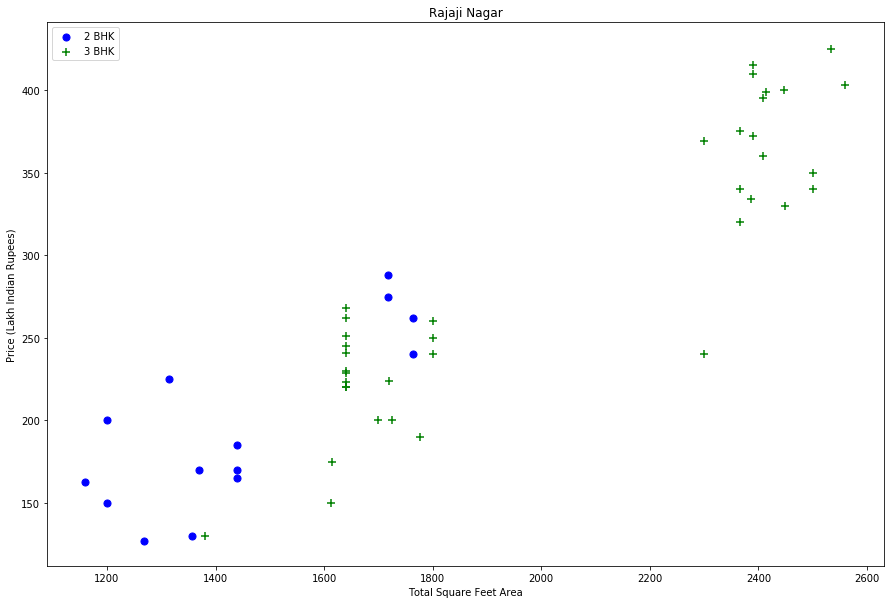

In [36]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")


In [37]:
# Here we observe that 3 BHK cost that same as 2 BHK in 'Hebbal' location hence removing such outliers is necessary

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)

print(df8.shape, df7.shape)

(7342, 9) (10288, 9)


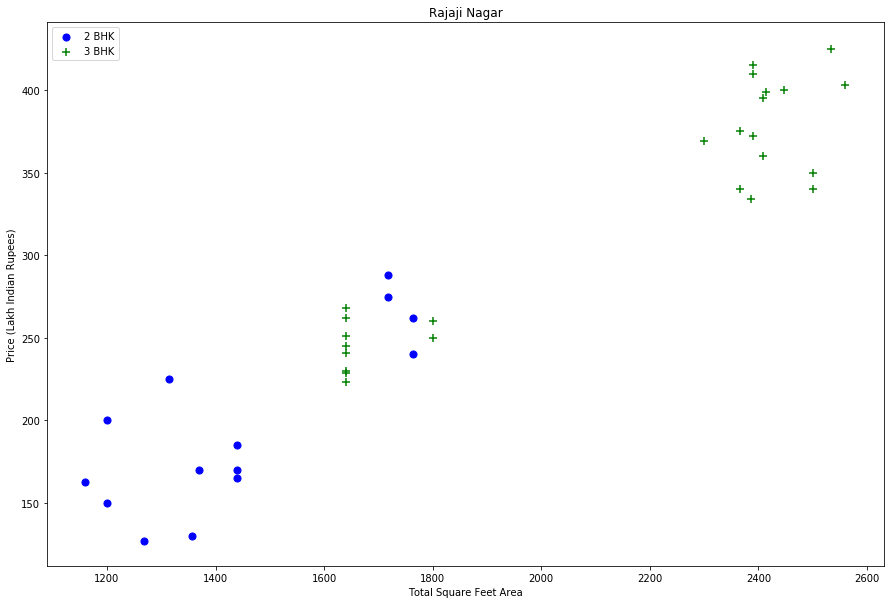

In [38]:
# We can see that some outliers have been removed
plot_scatter_chart(df8,"Rajaji Nagar")

Text(0, 0.5, 'Count')

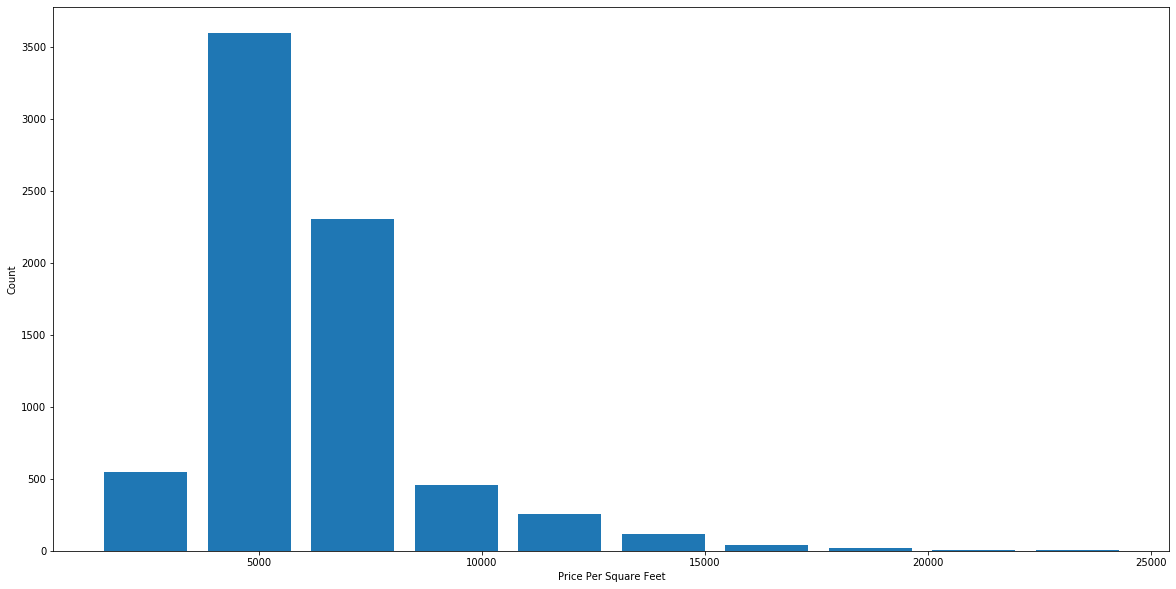

In [39]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")


price_per_sqft is almost a Gaussian Distribution

Text(0, 0.5, 'Count')

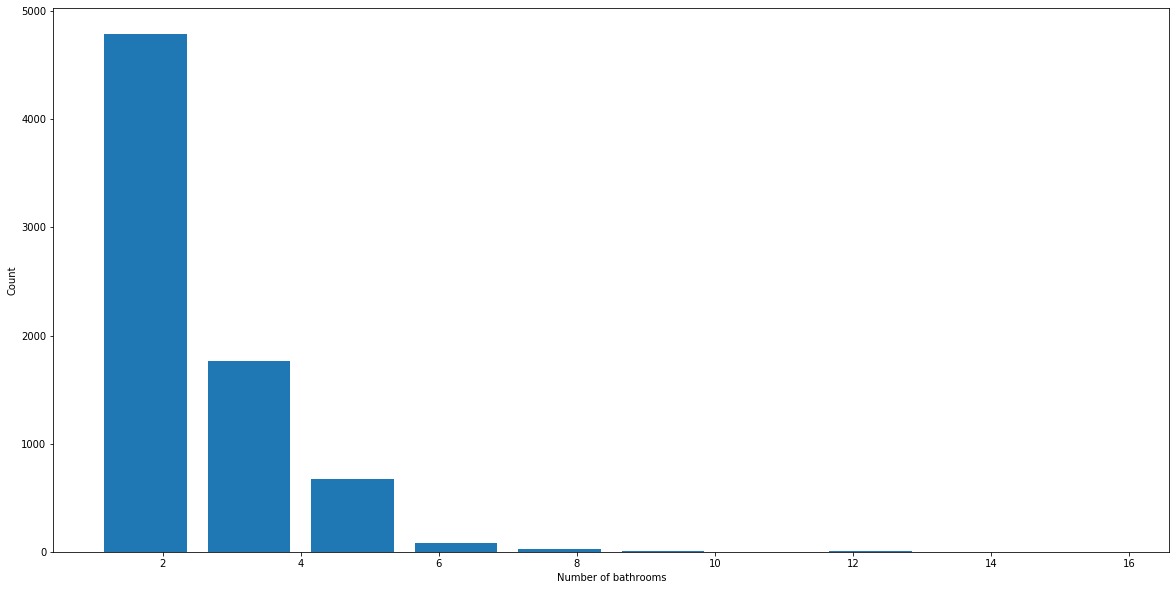

In [40]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [41]:
df8[df8.bath>10]

,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
5306,Ready To Move,Neeladri Nagar,10 BHK,4000.0,12.0,2.0,160.0,10,4000.000000
8527,Ready To Move,other,10 BHK,12000.0,12.0,2.0,525.0,10,4375.000000
8616,Ready To Move,other,16 BHK,10000.0,16.0,2.0,550.0,16,5500.000000
9351,Ready To Move,other,11 BHK,6000.0,12.0,2.0,150.0,11,2500.000000
9682,Ready To Move,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424


In [42]:
# It is unusual to have 2 more bathrooms than number of bedrooms in a home
df8[df8.bath>df8.bhk+2]

,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1634,Ready To Move,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
5267,Ready To Move,Nagasandra,4 Bedroom,7000.0,8.0,2.0,450.0,4,6428.571429
6748,Ready To Move,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
8452,Ready To Move,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689


In [43]:
# Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed

df8 = df8[df8.bath < df8.bhk+2]
df8.head()

,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Not Ready,1st Block Jayanagar,4 BHK,2850.0,4.0,1.0,428.0,4,15017.543860
1,Not Ready,1st Block Jayanagar,3 BHK,1630.0,3.0,2.0,194.0,3,11901.840491
2,Ready To Move,1st Block Jayanagar,3 BHK,1875.0,2.0,3.0,235.0,3,12533.333333
3,Not Ready,1st Block Jayanagar,3 BHK,1200.0,2.0,0.0,130.0,3,10833.333333
4,Not Ready,1st Block Jayanagar,2 BHK,1235.0,2.0,2.0,148.0,2,11983.805668


In [44]:
df8.shape

(7264, 9)

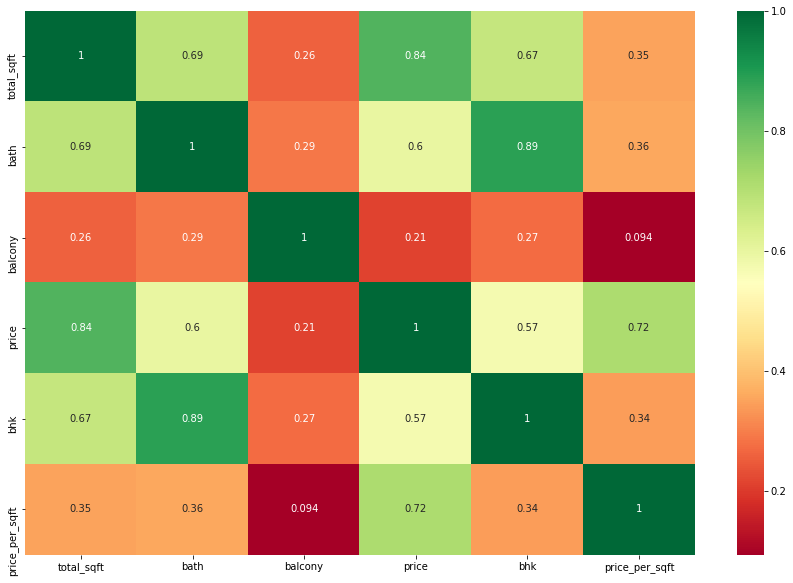

In [45]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(df8.corr(), annot=True, cmap='RdYlGn')

In [46]:
# Balcony is not as important 
df9 = df8.drop(['size','price_per_sqft',],axis='columns')
df9.head()

,availability,location,total_sqft,bath,balcony,price,bhk
0,Not Ready,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,Not Ready,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,Ready To Move,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,Not Ready,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
4,Not Ready,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2


#### One Hot Encoding for Categorical Data

In [47]:
dummy_1 = pd.get_dummies(df9.location).drop('other', axis='columns')
df10 = pd.concat([df9, dummy_1],axis=1 )

In [48]:
df10.head()

,availability,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Not Ready,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Not Ready,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Ready To Move,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Not Ready,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Not Ready,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
dummy_2 = pd.get_dummies(df9.availability).drop('Not Ready', axis='columns')
data = pd.concat([df10, dummy_2], axis=1)
data.head()

,availability,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Ready To Move
0,Not Ready,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Not Ready,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Ready To Move,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Not Ready,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Not Ready,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# Removing the columns not required
data.drop(['availability', 'location'], axis=1, inplace=True)
data.head()

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Ready To Move
0,2850.0,4.0,1.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1200.0,2.0,0.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
data.shape

(7264, 246)

## Model Building

In [52]:
X = data.drop(['price'], axis=1)
y = data['price']

In [53]:
X

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Ready To Move
0,2850.0,4.0,1.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1200.0,2.0,0.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10279,1200.0,2.0,3.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10280,1800.0,1.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10283,1353.0,2.0,2.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10284,812.0,1.0,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# Using GridSearchCV to find the best algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit

In [55]:
# Creating a function for GridSearchCV

def find_best_model(X,y):
    models = {
        'linear_regression': {
            'model': LinearRegression(),
            'parameters': {
                'normalize': [True,False]
            }
        },
        
        'lasso': {
            'model': Lasso(),
            'parameters': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'parameters': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'accuracy': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model', 'best_parameters', 'accuracy'])

find_best_model(X, y)

,model,best_parameters,accuracy
0,linear_regression,{'normalize': True},0.819003
1,lasso,"{'alpha': 1, 'selection': 'random'}",0.661112
2,decision_tree,"{'criterion': 'mse', 'splitter': 'random'}",0.700140


#### *Based on above results we can say that LinearRegression gives the best score. Hence we will use that.*

In [56]:
# Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)

In [57]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
y_pred = lr.predict(X_test)

In [59]:
lr.score(X_test, y_test)

0.8612447410616559

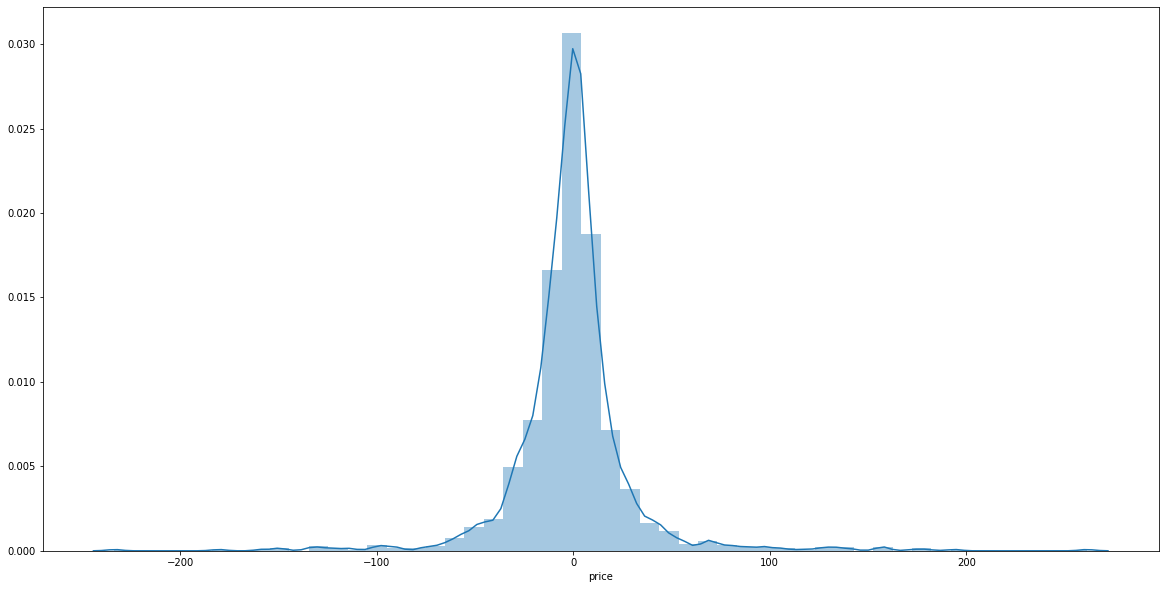

In [60]:
sns.distplot(y_test-y_pred)

#### Exporting the model to a Pickle file

In [61]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr, f)

#### Export location and column information to a file that will be useful later on in our prediction application

In [62]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))